In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#to diplay all visualization graphs

In [78]:
df=pd.read_csv("height-weight.csv")

In [79]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'height')

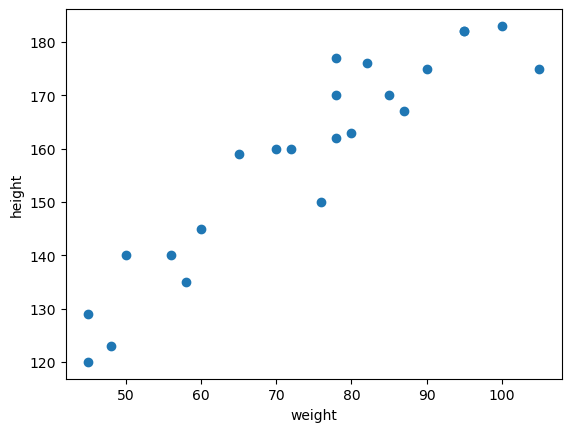

In [80]:
#scatter plot
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("weight")
plt.ylabel("height")

In [81]:
# linear relationship bw the two
# to check nature of relationship
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


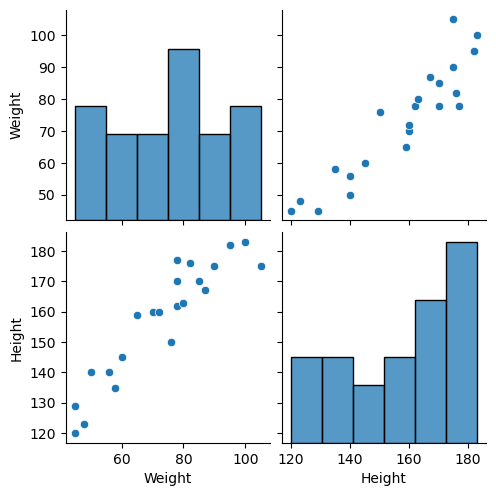

In [82]:
# seaborn for vislztn
import seaborn as sns
sns.pairplot(df)

In [83]:
# divide into independent and dependent features
x=df[["Weight"]] #inde feature should be dataframe/2d array
# np.array(x).shape...2d array
y=df["Height"]  #output:can be in series form/1d array

x_series=df["Weight"]
# np.array(x_series).shape

In [84]:
# train_test split   x_train,x_test=weight   y_train,y_test=height
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [85]:
x_train.shape   #2d
# y_train.shape   #1d

(17, 1)

In [86]:
# standardization
# apply z score to convert to: mean=0 and sd=1=(xi-mean)/sd
# z score is applied only on indep features(inputs)...x in this case
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
print(f"first{x_train}")
x_train=scaler.fit_transform(x_train) #applied z score formula to get new data points corresponding to x_TRAIN DATA 
print(f"2nd{x_train}")

first    Weight
1       58
13     100
5       78
2       48
11      95
20      45
3       60
4       70
18      76
16      50
21      56
22      72
7       90
10      82
14      85
19      87
6       80
2nd[[-0.87662801]
 [ 1.66773133]
 [ 0.33497168]
 [-1.48242785]
 [ 1.36483141]
 [-1.6641678 ]
 [-0.75546804]
 [-0.1496682 ]
 [ 0.21381171]
 [-1.36126788]
 [-0.99778797]
 [-0.02850823]
 [ 1.06193149]
 [ 0.57729161]
 [ 0.75903157]
 [ 0.88019153]
 [ 0.45613165]]


* now we need to apply same for test data
* x-train=fit_transform
* x-test=transform...it means we are using mean and sd of training data set then apply same z score formula
* why? to prevent data leakage
* if i use fit_tranform for x_text,means mean and sd will get calculated for x-test seperately,but we dont want that
 to prevent data leakage?we dont want training data to know any info about test data
 * test data should be seen as a new data

In [87]:
x_test=scaler.transform(x_test)
x_test


array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [88]:
# apply simple linear regression model
from sklearn.linear_model import LinearRegression
# initialize
regresion=LinearRegression()
# fit the model
regresion.fit(x_train, y_train)
# regresion.fit(x_series, y_train) 
# ValueError: Expected a 2-dimensional container but
#  got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing
#  a single row (i.e. single sample) or a single column (i.e. single feature) instead.


LinearRegression()

In [89]:
regresion.coef_    # y`=b0+b1X1... this is b1,x1=weight
print(f"coefficient or slope={regresion.coef_}")# b1.. 
# 1 unit movement in weight value (x-axis) leads to 17.29 units mov in height(y-axis)
print(f"Intercept={regresion.intercept_}")
# will intersect y axis at 156.47(when x=0)

coefficient or slope=[17.2982057]
Intercept=156.47058823529412


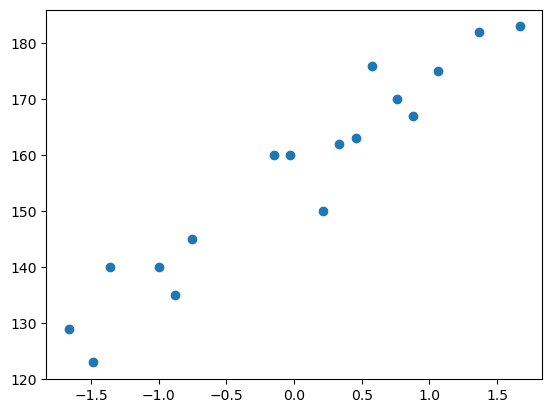

In [90]:
# to visualize line:
# plot best fit line wrt training data
plt.scatter(x_train,y_train)


Text(0.5, 1.0, 'best fit line in linear regression')

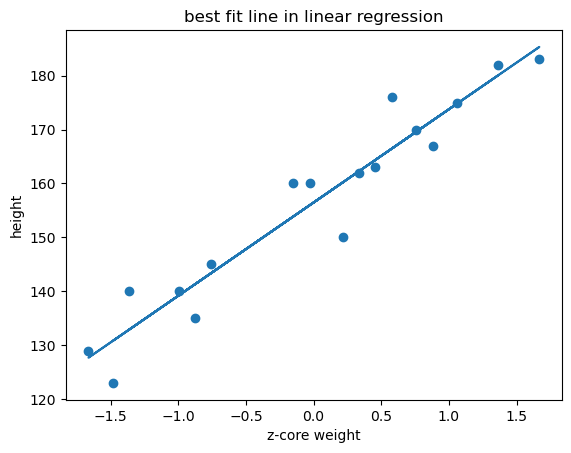

In [91]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regresion.predict(x_train))
# see at x = o ,line will cross y axis at 156.47..
plt.ylabel("height")
plt.xlabel("z-core weight")
plt.title("best fit line in linear regression")

prediction for test data


* prediction of test data
* predicted height output=intercept + coef_(weights)
* y_pred_test=156.47+17.29(x_test)

In [92]:
y_pred=regresion.predict(x_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

performance metrices


In [93]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


r square


In [94]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)


0.7360826717981276


In [95]:
# adjusted r sq
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6701033397476595

ols linear regression

In [97]:
import statsmodels.api as sm
model=sm.OLS(y_train,x_train).fit()
prediction=model.predict(x_test)

In [98]:
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [99]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sun, 12 Jan 2025   Prob (F-statistic):                       0.664
Time:                        14:55:02   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [101]:
# prediction for new data,it should be in 2d
regresion.predict([[72]])
# amazed by answer?

array([1401.94139895])

In [102]:
# we missed standardization
regresion.predict(scaler.transform([[72]]))

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

In [103]:
scaler.transform([[72]])

c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.02850823]])

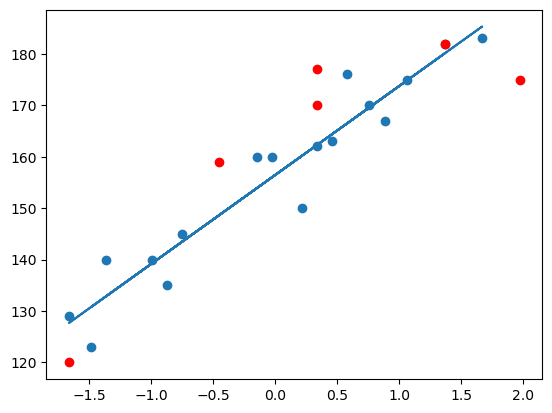

In [106]:
plt.scatter(x_train,y_train)
plt.plot(x_train,regresion.predict(x_train))

plt.scatter(x_test,y_test,color='red')


[127.68347133]


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


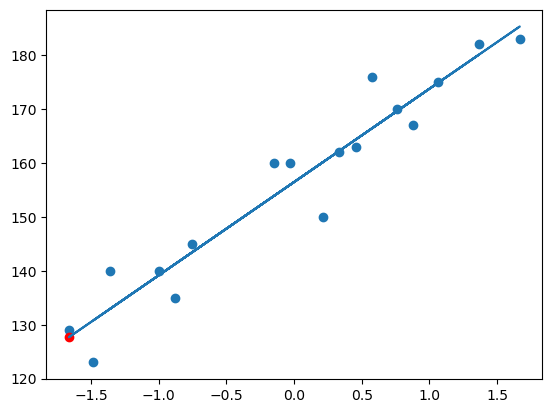

In [109]:
ip=int(input("enter input to predict height"))
ipz=scaler.transform([[ip]])#do standr...
op=regresion.predict(ipz)
plt.scatter(x_train,y_train)
plt.plot(x_train,regresion.predict(x_train))

plt.scatter(ipz,op,color='red')
print(op)